In [1]:
import wsiprocess as wp
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/opt/ASAP/bin")
import multiresolutionimageinterface as mir
import numpy as np
from scipy.ndimage.filters import median_filter
from skimage.transform import resize

In [2]:
# path_source_wsi = '/mnt/c/WSI/'
path_source_wsi = './sample/'

# path_source_files = '/mnt/c/WSI/'
path_source_files = './sample/'
path_output = './projects/Test2'
# path_source = './sample/'


In [3]:
# slidefile = '285f74bb6be025a676b6.svs'
# slidefile = 'CMU-1.ndpi'
slidefile = 'CMU-1.tif'
# slidefile = 'OS-17-06136_2951EB32-182D-4C09-AD64-8244A2EFB382.scn'
# slidefile = '2efb541724b5c017c503.svs'

# annotationfile = '2e611073cff18d503cea.xml'
# annotationfile = 'CMU-1.xml'
annotationfile = 'CMU-1_single.xml'
# annotationfile = 'CMU-1_detection.xml'
# annotationfile = 'OS-17-06136_2951EB32-182D-4C09-AD64-8244A2EFB382.xml'
# annotationfile = '2efb541724b5c017c503.xml'

rulefile = 'rule.json'
# rulefile = 'rule_mal_benign.json'

slide_path = str(path_source_wsi + slidefile)
annot = path_source_files + annotationfile
rule_path = path_source_files + rulefile

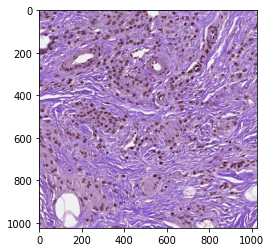

In [4]:
reader = mir.MultiResolutionImageReader()
image = reader.open(slide_path)

dims = image.getLevelDimensions(6)
tile = image.getUCharPatch(0, 0, dims[0], dims[1], 6)
plt.imshow(tile)

tile = image.getUCharPatch(31156, 10394, 1024, 1024, 0)
plt.imshow(tile)



In [17]:
# Loads the list of annotations from disk
annotation_list = mir.AnnotationList()
xml_repository = mir.XmlRepository(annotation_list)
xml_repository.setSource(annot)
xml_repository.load()

#Access the first annotation (index 0)
#and print the aread, number of points and
# x-coordinate of the first point.abs

annotation = annotation_list.getAnnotation(0)

print(annotation.getArea())
# print(image.getLevelDimensions)
print(annotation.getNumberOfPoints())
print(annotation.getCoordinate(0).getX())
print(annotation.getCoordinate(1).getX())

# Convert the annotations to an indexed image
annotation_mask = mir.AnnotationToMask()
label_map = {'benign':1, 'malignant':2}
output_path = path_output
annotation_mask.convert(annotation_list, './projects/Test2/ASAP_Mask_01.tif', image.getDimensions(), image.getSpacing(), label_map)

level_dims = image.getLevelDimensions(2)
level_ds = image.getLevelDownsample(2)
print(level_dims[0])
print(level_ds)



14281.5
4
41130.22265625
41253.921875
11500
4.0


In [23]:
level_dims = image.getLevelDimensions(3)
level_ds = image.getLevelDownsample(3)
tile = image.getUCharPatch(0, 0, level_dims[0], level_dims[1], 3)
tile_clipped = np.clip(tile, 1, 254)
tile_od = -np.log(tile_clipped / 255.)
D = median_filter(np.sum(tile_od, axis=2) / 3., size=3)
raw_mask = (((D > 0.02 * -np.log(1/255)) * (D < 0.98 * -np.log(1/255.))).astype("ubyte"))

out_dims = image.getLevelDimensions(0)
step_size = int(512. / int(level_ds))

writer = mir.MultiResolutionImageWriter()
writer.openFile('./projects/Test2/ASAP_Mask_01.tif')
writer.setTileSize(512)
writer.setCompression(mir.LZW)
writer.setDataType(mir.UChar)
writer.setInterpolation(mir.NearestNeighbor)
writer.setColorType(mir.Monochrome)
writer.writeImageInformation(out_dims[0], out_dims[1])

for y in range(0, level_dims[1], step_size):
    for x in range(0, level_dims[0], step_size):
        write_tl = np.zeros((step_size, step_size), dtype='ubyte')
        cur_tl = raw_mask[y:y+step_size, x:x+step_size]
        write_tl[0:cur_tl.shape[0], 0:cur_tl.shape[1]] = cur_tl
        res_tl = resize(writ_tl, (512,512), order=0, mode='constant', preserve_range=True).astype('ubyte')
        write.writeBaseImagePart(res_tl.flatten())
writer.finishImage()




NameError: name 'x' is not defined